In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#displays graphs and images in cells instead of in a new window
%matplotlib inline

(900, 1440, 3)


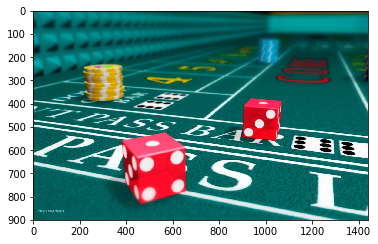

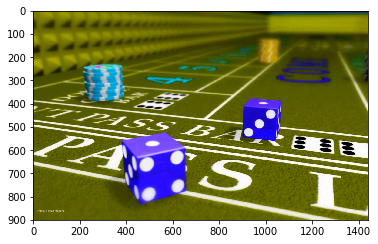

In [11]:
img = cv2.imread("craps.jpeg")
#you can also read in an image as a colorscheme with an 
#optional argument: IMREAD_COLOR, IMREAD_GRAYSCALE, etc
#put a cv2. in front of the optional arguments

print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(img)#displayed as the default bgr color order
plt.show()

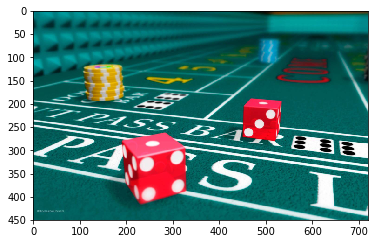

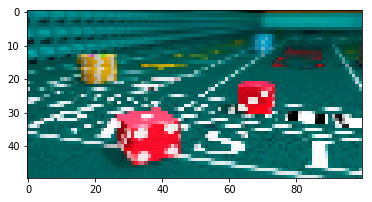

In [8]:
small = cv2.resize(img, (0,0), fx=0.5, fy=0.5) #resize both axis by half
small2 = resized_image = cv2.resize(img, (100, 50)) #resize to given dimensions
plt.imshow(cv2.cvtColor(small, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(small2, cv2.COLOR_BGR2RGB))
plt.show()

grayscale image shape (900, 1440)
grayscale max value is 255 and min value is 0


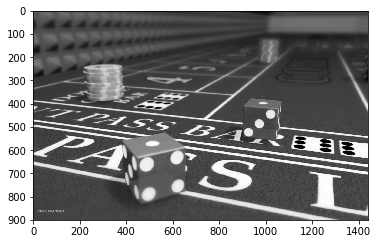

In [15]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("grayscale image shape", gray_img.shape)
print("grayscale max value is {} and min value is {}".format(gray_img.max(), gray_img.min()))
plt.imshow(gray_img, cmap='gray')
plt.show()

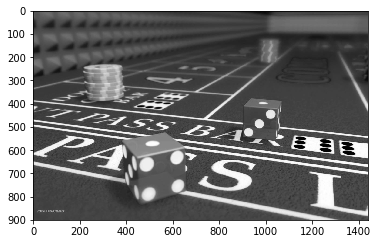

In [16]:
cv2.imwrite('gray_craps.jpeg', gray_img)
gray_img = cv2.imread("gray_craps.jpeg")
plt.imshow(gray_img, cmap='gray')
plt.show()

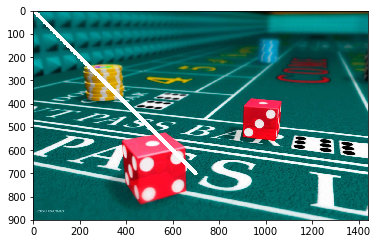

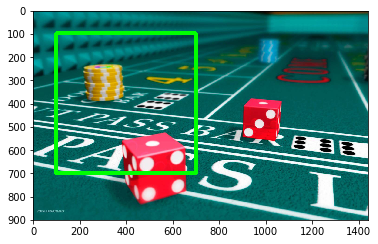

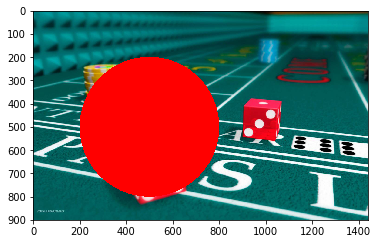

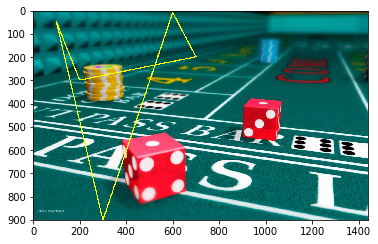

In [35]:

# arguments: image, tuple for beg, tuple for end, color tuple, width of line
img = cv2.imread("craps.jpeg")
clone = img.copy()
clone1 = img.copy()
clone2 = img.copy()
clone3 = img.copy()
clone4 = img.copy()

cv2.line(clone, (0, 0), (700, 700), (255, 255, 255), 15)
plt.imshow(cv2.cvtColor(clone, cv2.COLOR_BGR2RGB))
plt.show()

cv2.rectangle(clone1, (100, 100), (700, 700), (0, 255, 0), 15)
plt.imshow(cv2.cvtColor(clone1, cv2.COLOR_BGR2RGB))
plt.show()

cv2.circle(clone2,(500,500), 300, (0,0,255), -1) #-1 for line thickness if you want to fill

plt.imshow(cv2.cvtColor(clone2, cv2.COLOR_BGR2RGB))
plt.show()

pts = np.array([[100,50],[200,300],[700,200],[600,10], [300, 900]], np.int32)
cv2.polylines(clone3, [pts], True, (0,255,255), 3)
#params: image, points, connect first and last point?, color, thickness

plt.imshow(cv2.cvtColor(clone3, cv2.COLOR_BGR2RGB))
plt.show()

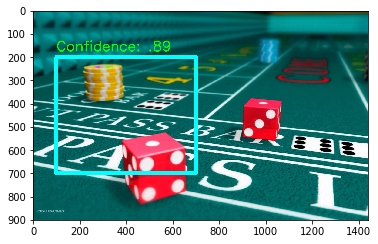

In [36]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(clone4, "Confidence: .89", (100, 175), font, 2, (0, 255, 0), 4, cv2.LINE_AA )
# params: image, text, start loc, font, rel size, color, thickness, antialiasing

cv2.rectangle(clone4, (100, 200), (700, 700), (255, 255, 0), 15)
plt.imshow(cv2.cvtColor(clone4, cv2.COLOR_BGR2RGB))
plt.show()

pixel value at 100,100: [116 116   0]
Value of blue: 116


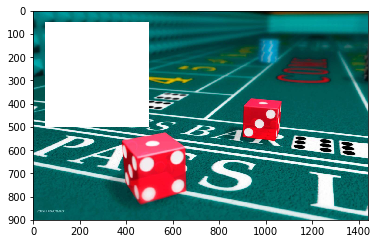

In [50]:
px = img[100,100]
print("pixel value at 100,100:", px)
# accessing only the blue component of a pixel
blue = img[100,100,0]
print("Value of blue:", blue)

#Changing the values of pixels
clone5 = img.copy()
clone5[50:500, 50:500] = [255,255,255]
plt.imshow(cv2.cvtColor(clone5, cv2.COLOR_BGR2RGB))
plt.show()


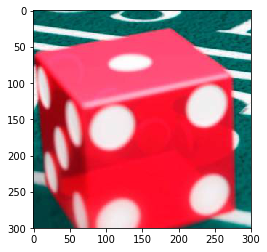

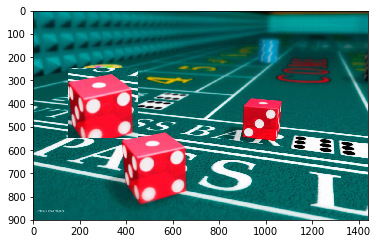

In [56]:

clone4 = img.copy()

y1, x1 = 500, 380
diff = 300


die = img[y1:y1 + diff, x1:x1 + diff]
plt.imshow(cv2.cvtColor(die, cv2.COLOR_BGR2RGB))
plt.show()

y2, x2 = 250, 150
clone4[y2:y2+diff, x2:x2+diff] = die

plt.imshow(cv2.cvtColor(clone4, cv2.COLOR_BGR2RGB))
plt.show()

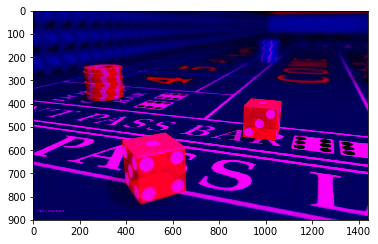

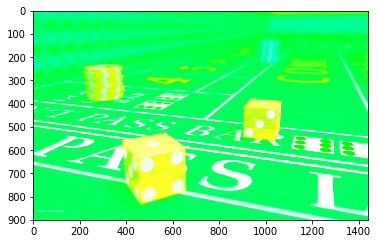

In [63]:
b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))

#or
b = img[:,:,0]

#make all the red pixels 0
clone6 = img.copy()
clone6[:,:,1] = 0
plt.imshow(cv2.cvtColor(clone6, cv2.COLOR_BGR2RGB))
plt.show()

clone6[:,:,1] = 255
plt.imshow(cv2.cvtColor(clone6, cv2.COLOR_BGR2RGB))
plt.show()

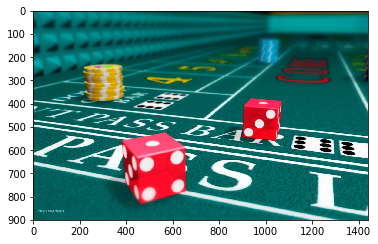

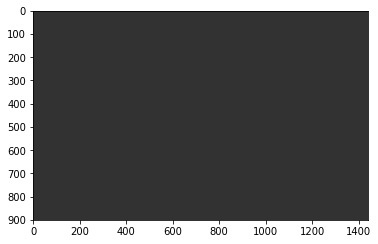

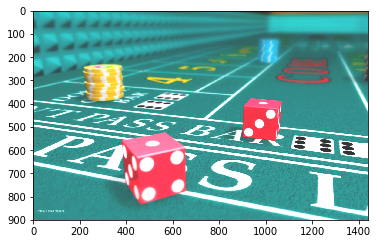

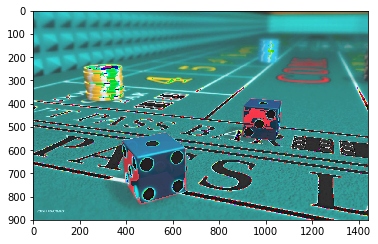

In [68]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

mask = img.copy()
mask[:,:,:]= 50
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(cv2.add(img, mask), cv2.COLOR_BGR2RGB))
plt.show()

#as opposed to the numpy add
plt.imshow(cv2.cvtColor(img + mask, cv2.COLOR_BGR2RGB))
plt.show()

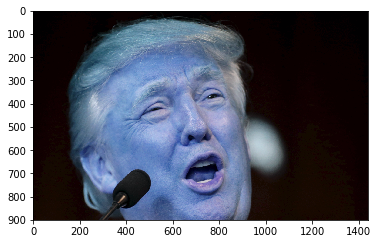

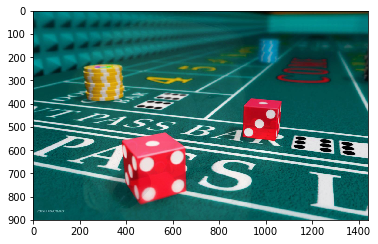

In [76]:
#There is a nefarious secret face behind the gambling addictions in America
#Who is it??!!

secret = cv2.imread("secret.jpg")
secret = cv2.resize(secret, (0,0), fx=0.5, fy=0.5)
img_ht = img.shape[0]
img_wi = img.shape[1]
secret = secret[:img_ht, :img_wi, :]
dst = cv2.addWeighted(img, 0.9, secret, 0.1,0)

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

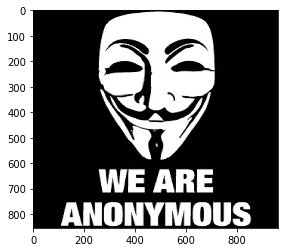

In [78]:
img2 = cv2.imread('anon.jpeg')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

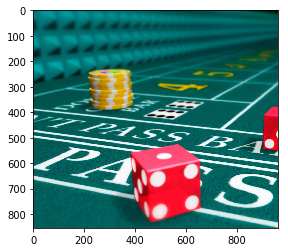

In [79]:

# To put the logo on the top-left corner, create a ROI
rows,cols,channels = img2.shape
roi = img[0:rows, 0:cols ]

plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.show()

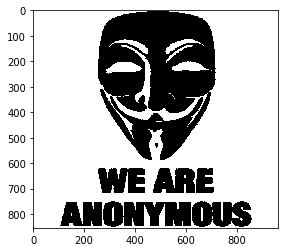

In [88]:

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

plt.imshow(mask_inv, cmap="gray")
plt.show()

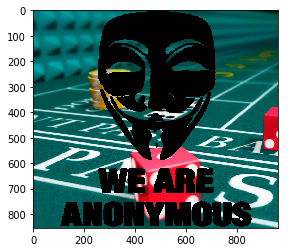

In [87]:
#Here we change the roi so that the black areas in the mask are black
#in it as well, using &
img1_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)
plt.imshow(cv2.cvtColor(img1_bg, cv2.COLOR_BGR2RGB))
plt.show()

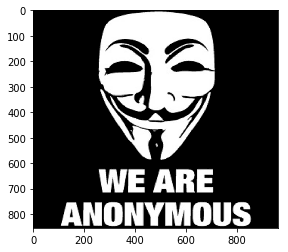

In [83]:
#This just gets the pixels in the logo that are in the mask's area
img2_fg = cv2.bitwise_and(img2, img2, mask = mask)
plt.imshow(img2_fg)
plt.show()

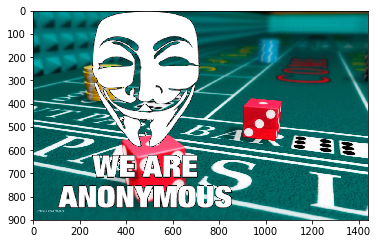

In [84]:

#The area where the white mask is is now 0 in the original image, so 
#adding the logo will make those areas have the logo's value
dst = cv2.add(img1_bg,img2_fg)
img[0:rows, 0:cols ] = dst
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

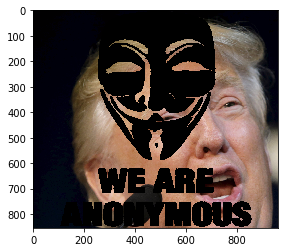

In [91]:
secret = cv2.imread("secret.jpg")
secret = cv2.resize(secret, (0,0), fx=0.5, fy=0.5)
img_ht = mask_inv.shape[0]
img_wi = mask_inv.shape[1]
secret = secret[:img_ht, :img_wi, :]
img1_bg = cv2.bitwise_and(secret, secret, mask = mask_inv)
plt.imshow(cv2.cvtColor(img1_bg, cv2.COLOR_BGR2RGB))
plt.show()